# Case Study 2: How Can a Wellness Technology Company Play It Smart?

### Google data analytics certificate capstone project
Ellis Reyes 13/01/2022


*disclaimer: This notebook will be used to practice the data analysis process learned in the certification.*

 ## Phase 1: ASK

Key tasks:
1. Identify the business task.
2. Consider key stakeholders.

The business task for this case is to help the marketing team design a strategy, analyzing data of how consumers use smart devices with fitness porpuses so the team can use that information and apply that knowledge for Bellabeat products. Finding indsights can hel the team because depending on how, when and where consumers use smart devices for fitness, a marketing strategy can be designed around that information which can be used to understand our target audience. The key stakeholders are the executive officers of the company and the marketing team.

# Phase 2: Prepare

Key tasks
1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.


The data is stored  in .CSV files, they can be found at [FitBit Fitness](https://www.kaggle.com/arashnic/fitbit) and also there’s an internal backup in gdrive. The datasets are structured tables with columns and rows in spreadsheets. They are in wide and long format. The data was gathered from a random sample of volunteer users that decided to share their data in a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. It isn't the most current data, however, it is reliable data, [cited](https://zenodo.org/record/53894#.Ydc1C_DMJhG) and used by a lot of kaggle users. All the volunteers consent to the use of their data. The users are identified by ID and not by name and the data is public domain CCO. The integrity of the data will be mantained by making sure the data is consistent throughout all the .CSVs and being careful if the data will be manipulated, transferred or replicated. At first glance the data seems ok, there are some blank values and minor things like date formats that will be cleaned in the process step.




# Phase 3: Process

Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.


Some tools that can be used for processing data are spreadsheets that works well with small data, SQL that works well with big data and notebooks with python like colab, kaggle or jupyter. For this specific case, some python libraries like [pandas](https://pandas.pydata.org/docs/), [numpy](https://numpy.org/doc/) and [matplotlib](https://matplotlib.org) will be used to analyze data from .CSVs. A backup of the original data was made in case some mistakes happen when manipulating data, which will be carefully used when being manipulated with the tools, also, when mapping data to merge/aggregate be careful that the consistency of data is maintained throughout the process.

In spreadsheets before merging with pandas in python: 

Review the data with conditional formatting, removing duplicates, formatting dates and other spreadsheets tools and with data validation doing some testing of the data mapping, inspecting some values with different samples.

* Conditional formatting looking for empty values
* Trim to eliminate white spaces
* Filters to look for nulls, empty spaces and duplicates
* Date formatting
* Review the consistency of the datasets merged

In general, this data is mostly already cleaned, structured, organized and some of the tables merged (aggregated). Is highly possible the data will be used in spreadsheets, SQL and notebooks.



# Phase 4: Analyze

Key tasks
1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.


Before starting the analysis some of the things I think can be helpful to review is the amount of days clients used the device, the distance they walked,  types of activity they did(intensity), the amount of calories burned, heart rate, amount of sleep. Also, I think doing some statistical calculations like mean, standard deviation, min and max values can be helpful to get some relations or correlations between quantities, like, amount of steps vs calories burned, amount of sleep vs type of activity and type of activity vs calories burned.

Now having some ideas of what to do is time analyze the .CSVs and to do some data aggregation with pandas when necesssarily, using the function **pd.merge()**. The function **pd.melt()** can also be useful to convert wide to long data and viceversa. Also, dates were formatted to datetime type with the function pd.to_datetime() so they could be used for the visualizations.

In [1]:
# importing necessarily libraries
# remember to upload the CSVs to colab in a directory called /data if you want to analyze the datasets
import pandas as pd # to manipulate data
import numpy as np # it is useful for linear algebra and math
import matplotlib.pyplot as plt # to plot visualizations
import datetime # to format dates

In [5]:
# Reading the .CSVs
dailyActivity_merged = pd.read_csv("data/dailyActivity_merged.csv")
sleep = pd.read_csv('data/sleepDay_merged.csv')
heart_data = pd.read_csv('data/heartrate_seconds_merged.csv')
# every .CSV can be read like that with pandas

In [6]:
# Most pandas objects are DataFrames
type(dailyActivity_merged)

pandas.core.frame.DataFrame

In [7]:
# and we can access the dataset like this
dailyActivity_merged

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [8]:
# or this, if we want only the information of one specific column

dailyActivity_merged["Id"]

0      1503960366
1      1503960366
2      1503960366
3      1503960366
4      1503960366
          ...    
935    8877689391
936    8877689391
937    8877689391
938    8877689391
939    8877689391
Name: Id, Length: 940, dtype: int64

In [9]:
# If we have some dataset and want to convert it to a pandas DataFrame
df = pd.DataFrame(dailyActivity_merged)
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [10]:
# to familiarize with a data set we can use the functions. head(), describe(),info(), columns and shape
df.head() # it only give us the first 5 rows

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
df.columns # show us the name of the columns of the dataset

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [12]:
df.shape # (rows,columns) of the dataset

(940, 15)

In [13]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [14]:
df.describe() # give us an statistical summary of some metrics

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [15]:
# now that we are familiarized with the dataset we need to do some formating and aggregation
# we can use sort_values(by='') to sort
# df.filter(items=[]) to filter information
# pd.to_datetime() to format dates to a useful type and perform calculations
# pd.merge() to aggregate data

In [26]:
# formating dates

"""
Ahora queremos convertir las fechas en formato estandar a tiempo. usamos la funcion de pandas pd.to_datetime() que convierte un
string a una clase datetime df['date'] = pd.to_datetime(df.date).

asi se separa solo la fecha sin el tiempo:
heart_data["Time"] = pd.to_datetime(heart_data.Time, format='%Y:%M:%D').dt.date
"""

df['ActivityDate'] = pd.to_datetime(df.ActivityDate)
sleep["SleepDay"] = pd.to_datetime(sleep.SleepDay)
#heart_data["Time"] = pd.to_datetime(heart_data.Time)
#heart_data["Time"] = pd.to_datetime(heart_data.Time, format='%Y:%M:%D').dt.date


In [20]:
# ahora el tipo de las fechas es datetime
df['ActivityDate'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [27]:
# aggregating data

#here we combine the sleep dataset with dailyActivitymerged like an inner join on the columns Id an Date but they have different names
#so we use left_on=['Id','SleepDay'],right_on=['Id','ActivityDate'] where SleepDay == ActivityDate.
merge1 = pd.merge(sleep,df,how='inner',left_on=['Id','SleepDay'],right_on=['Id','ActivityDate']) 

In [28]:
merge1.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
3,1503960366,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
4,1503960366,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728


In [29]:
# now we start analyzing the properly formatted data

In [30]:
# we want to review the consistency of the users, to do that we count the Id column of dailyActivity_merged dataset

In [31]:
# we add the count to the variable count_id
count_id = dailyActivity_merged["Id"].value_counts()
count_id

1624580081    31
4319703577    31
2320127002    31
4020332650    31
1503960366    31
4388161847    31
7086361926    31
2026352035    31
1927972279    31
2022484408    31
1844505072    31
4702921684    31
4558609924    31
8053475328    31
8877689391    31
5553957443    31
4445114986    31
6962181067    31
8378563200    31
8583815059    31
2873212765    31
3977333714    30
5577150313    30
1644430081    30
8792009665    29
6290855005    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

In [32]:
# Users with 31 entries were really consistent throughout the month. One user only used the app/devices 4 days.

In [33]:
# we can get the mean, min and max values of daily activity

In [34]:
print("The mean value of daily activity is: ", count_id.mean())
print("The min value of daily activity is: ", count_id.min())
print("The max value of daily activity is: ", count_id.max())

The mean value of daily activity is:  28.484848484848484
The min value of daily activity is:  4
The max value of daily activity is:  31


In [35]:
# we can do the same with calories burned and so on
print("The mean value of calories burned a day by users is: ", dailyActivity_merged["Calories"].mean())
print("The standar deviation value of calories burned a day by users is: ", dailyActivity_merged["Calories"].std())
print("The min value of calories burned a day by users is: ", dailyActivity_merged["Calories"].min())
print("The max value of calories burned a day by users is: ", dailyActivity_merged["Calories"].max())

The mean value of calories burned a day by users is:  2303.609574468085
The standar deviation value of calories burned a day by users is:  718.1668621342561
The min value of calories burned a day by users is:  0
The max value of calories burned a day by users is:  4900


In [ ]:
# now we can show some graphs

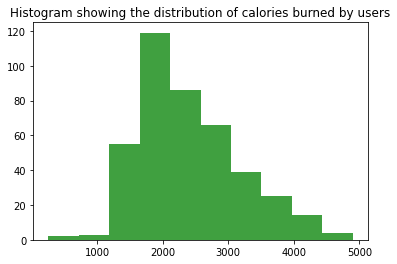

In [ ]:
# we can show with a histrogram the mean, min an max values of a column
# we show it for calories burned we compute earlier

plt.title("Histogram showing the distribution of calories burned by users")
plt.hist(merge1["Calories"],facecolor='g', alpha=0.75)
plt.show()

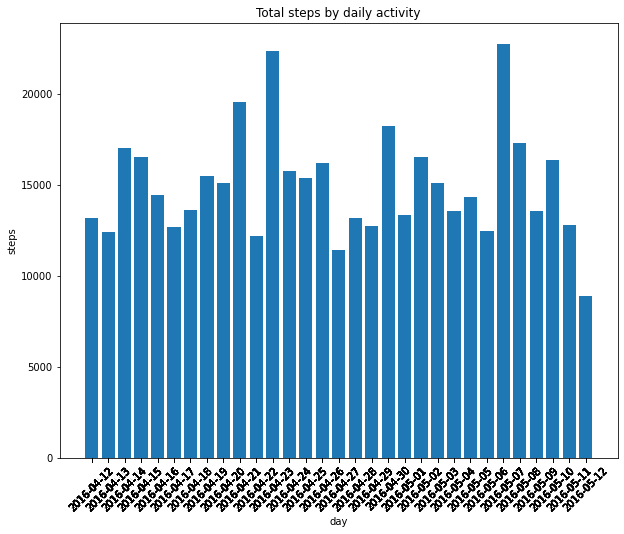

In [36]:
# a bar graph showing the totalsteps by users per day
plt.figure(figsize=(10,8))
plt.title("Total steps by daily activity")
plt.xlabel("day")
plt.ylabel("steps")
plt.bar(merge1["ActivityDate"],merge1["TotalSteps"])
plt.xticks(rotation=45) #to show more clearly the xvalues
plt.xticks(merge1["ActivityDate"]) #to show more clearly the xvalues
plt.show()

In [37]:
"""
we can also plot the daily activity by day of the week
to do that we change the datetime to day of the week
on the respective column of dailyActivitymerged dataset.

for integrity pourposes we define another DataFrame with the same dataset
"""
df2 = dailyActivity_merged.loc[:,['ActivityDate','TotalSteps']] 
df2["ActivityDate"]=pd.to_datetime(df2.ActivityDate)
df2['ActivityDate'] = df2.ActivityDate.dt.dayofweek
df2.head()

,ActivityDate,TotalSteps
0,1,13162
1,2,10735
2,3,10460
3,4,9762
4,5,12669


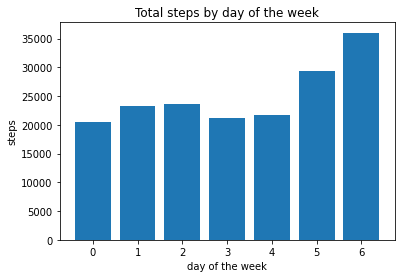

In [38]:
# same bar graph but now ploting by day of the week
plt.title("Total steps by day of the week")
plt.xlabel("day of the week")
plt.ylabel("steps")
plt.bar(df2["ActivityDate"],df2["TotalSteps"])
plt.show()

<BarContainer object of 940 artists>

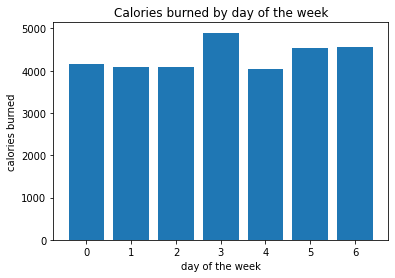

In [40]:
"""
we can see that users walk more on the weekend, it is expected.
Something interesting is that even they walk more on the weekend
on average they burn more calories on thursdays, this can be because as expected 
people tend to walk more on the weekends.

"""
plt.title("Calories burned by day of the week")
plt.xlabel("day of the week")
plt.ylabel("calories burned")
plt.bar(df2["ActivityDate"],df["Calories"])

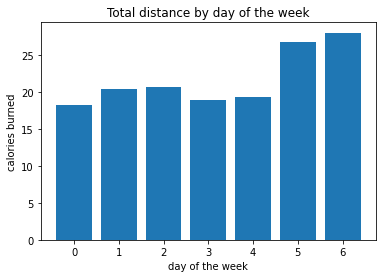

In [42]:
plt.title("Total distance by day of the week")
plt.xlabel("day of the week")
plt.ylabel("calories burned")
plt.bar(df2["ActivityDate"],df["TotalDistance"])
plt.show()

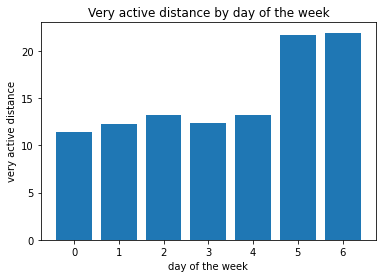

In [43]:
plt.title("Very active distance by day of the week")
plt.xlabel("day of the week")
plt.ylabel("very active distance")
plt.bar(df2["ActivityDate"],df["VeryActiveDistance"])
plt.show()

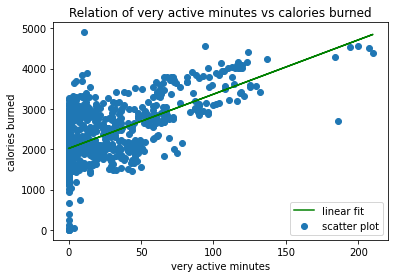

In [45]:
"""
now we can try to find some relations/correlations among variables with scatter plot and
fitting the data with linear regressions
"""

# a positive relation between very active minutes and calories burned
# as expected the more active minutes, the more calories burned

plt.scatter(dailyActivity_merged["VeryActiveMinutes"],dailyActivity_merged["Calories"])
plt.title("Relation of very active minutes vs calories burned")
plt.xlabel("very active minutes")
plt.ylabel("calories burned")
m, b = np.polyfit(dailyActivity_merged["VeryActiveMinutes"], dailyActivity_merged["Calories"], 1) #m, b = np.polyfit(x, y, 1) where: m = slope, b=intercept. more info:https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python
plt.plot(dailyActivity_merged["VeryActiveMinutes"], m*dailyActivity_merged["VeryActiveMinutes"] + b,color='green')
plt.legend(["linear fit","scatter plot"])
plt.show()



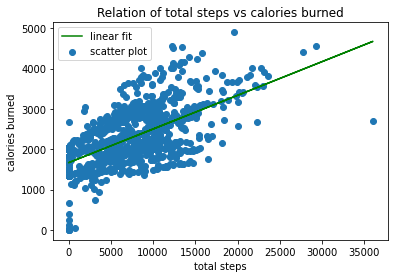

In [46]:
# a positive relation between total steps  and calories burned
# as expected the more total steps, the more calories burned
plt.scatter(dailyActivity_merged["TotalSteps"],dailyActivity_merged["Calories"])
m, b = np.polyfit(dailyActivity_merged["TotalSteps"], dailyActivity_merged["Calories"], 1) 
plt.plot(dailyActivity_merged["TotalSteps"], m*dailyActivity_merged["TotalSteps"] + b,color='green')
plt.title("Relation of total steps vs calories burned")
plt.xlabel("total steps")
plt.ylabel("calories burned")
plt.legend(["linear fit","scatter plot"])
plt.show()


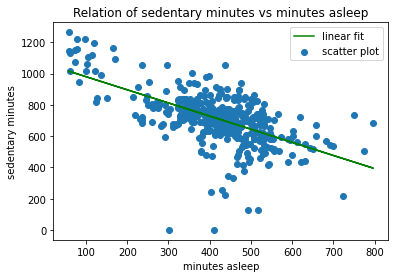

In [51]:
# a negative relation between sedentary minutes with total minutes asleep
# this negative relation means the more sedentary minutes, the less sleep the user

# to do this we need the merged1 dataframe

plt.scatter(merge1["TotalMinutesAsleep"],merge1["SedentaryMinutes"])
m, b = np.polyfit(merge1["TotalMinutesAsleep"],merge1["SedentaryMinutes"],1)
plt.plot(merge1["TotalMinutesAsleep"],m*merge1["TotalMinutesAsleep"]+b,color='g')
plt.title("Relation of sedentary minutes vs minutes asleep")
plt.xlabel("minutes asleep")
plt.ylabel("sedentary minutes")
plt.legend(["linear fit","scatter plot"])
plt.show()


In [113]:
""" 
now we want to compare total time in bed vs time asleep .to do that we will do a comparative bar chart.
it is needed to convert the DataFrames to arrays because we need someting called broadcasting, and
we cant broadcast DataFrames but we can do that to arrays.
"""
# to mantain integrity of the original aggregated data (merge1) we will declare another variable wit de DataFrame
dates_df = merge1
dates_df["ActivityDate"] = pd.to_datetime(dates_df["ActivityDate"]) # to convert to datatime 
dates_df["ActivityDate"] = dates_df.ActivityDate.dt.dayofweek  # to convert the datatime to day of the week


In [114]:
# now we convert the DataFrames to numpy arrays
dates_array = dates_df["ActivityDate"].to_numpy()
time_bed_array = merge1["TotalTimeInBed"].to_numpy()
time_asleep_array = merge1["TotalMinutesAsleep"].to_numpy()


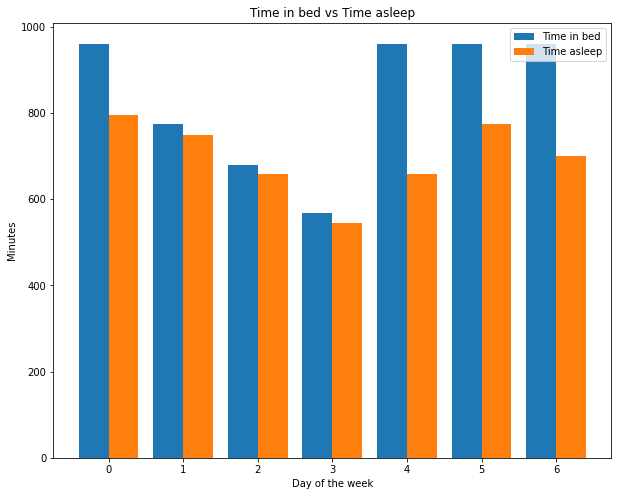

In [121]:
# now we can plot the comparative bar chart
# we can see that users stay more time in bed than sleeping
plt.figure(figsize=(10,8))
plt.bar(dates_array - 0.2, time_bed_array,0.4)
plt.bar(dates_array + 0.2, time_asleep_array,0.4)
plt.xlabel("Day of the week")
plt.ylabel("Minutes")
plt.title("Time in bed vs Time asleep")
plt.legend(['Time in bed','Time asleep'])
plt.show()

What was found ?

Some expected positive and negative correlations among variables. A positive relation between "VeryActiveMinutes" and "Calories", "TotalSteps" and "Calories" was found. It is expected that if the intensity of the exercise is higher or the amount of steps are a lot, more calories will be burned, an that is the meaninf of a positive relation, if a variable increases the other also increases. Something unexpected that was found was the negative relation between "TotalMinutesAsleep" and "SedentaryMinutes". If we remember the theory, a negative correlation means that if a variable decreases the other increases, in this case the meaning is that the more sedentary time a person spends, the less this person will spend sleeping. However, more analysis is necessary to conclude negative or positive correlations. Nevertheless, with this data we can confidently say that we found positive and negative relations between some variables. Also some statistical calculations can be calculated like: the mean of the calories burned by the customers were 2303.6 with standard deviation of 718.16. For every column in the datasets statistical metrics can be calculated if neccesary, also summarized with the function describe, as follows: dataset-name.describe().

With this knowledge we can generalize how users use this kind of devices and services and get indsights for the marketing team so they can design a marketing strategy for the target audience of the company.


# Phase 5: Share

Key task

1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible


If we obserb the graphs, we notice that most users use the devices constantly to track their physical state and health. Also to track the type of intensity of the exercise they do, the amount of steps they do, their heart rate, the sedentary time they spend and the amount of sleep. Therefore we can conclude that Bellabeat must develop an app easy to use, that helps users to constantly use the app, have a healthy lifestyle, track their record and help the users to stay less time in bed after waking up. 

We can define our target audience as people that maintain a healthy lifestyle and want to track their health. People that want to better their lifestyle to be more healthy. People that do exercise. Any person that wants to track data about health and have metrics about it. Currently social media is the most efficient way to get to people. Facebook, Instagram, Twitter, YT and Twitch to get to the maximum number of possible customers in a wide range of ages.

